In [37]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score


In [2]:
sep = "="*20

## Loading training data

In [ ]:
datadir = "../data/"
dft = pd.read_csv(datadir + "train.csv")


print(f"Shape of datatraining : {dft.shape}")
print(f"columns \n {dft.columns.values}\n")
print(f"Shape of datatraining : {dft.dtypes}\n\n")

print(dft.head())

Shape of datatraining : (225000, 325)
columns 
 ['_STATE' 'FMONTH' 'IDATE' 'IMONTH' 'IDAY' 'IYEAR' 'DISPCODE' 'SEQNO'
 '_PSU' 'CTELENM1' 'PVTRESD1' 'COLGHOUS' 'STATERE1' 'CELPHON1' 'LADULT1'
 'COLGSEX1' 'NUMADULT' 'LANDSEX1' 'NUMMEN' 'NUMWOMEN' 'RESPSLCT'
 'SAFETIME' 'CTELNUM1' 'CELLFON5' 'CADULT1' 'CELLSEX1' 'PVTRESD3'
 'CCLGHOUS' 'CSTATE1' 'LANDLINE' 'HHADULT' 'SEXVAR' 'GENHLTH' 'PHYSHLTH'
 'MENTHLTH' 'POORHLTH' 'PRIMINSR' 'PERSDOC3' 'MEDCOST1' 'CHECKUP1'
 'EXERANY2' 'SLEPTIM1' 'LASTDEN4' 'RMVTETH4' 'CVDSTRK3' 'ASTHMA3'
 'ASTHNOW' 'CHCSCNC1' 'CHCOCNC1' 'CHCCOPD3' 'ADDEPEV3' 'CHCKDNY2'
 'HAVARTH4' 'DIABETE4' 'DIABAGE4' 'MARITAL' 'EDUCA' 'RENTHOM1' 'NUMHHOL4'
 'NUMPHON4' 'CPDEMO1C' 'VETERAN3' 'EMPLOY1' 'CHILDREN' 'INCOME3'
 'PREGNANT' 'WEIGHT2' 'HEIGHT3' 'DEAF' 'BLIND' 'DECIDE' 'DIFFWALK'
 'DIFFDRES' 'DIFFALON' 'HADMAM' 'HOWLONG' 'CERVSCRN' 'CRVCLCNC' 'CRVCLPAP'
 'CRVCLHPV' 'HADHYST2' 'HADSIGM4' 'COLNSIGM' 'COLNTES1' 'SIGMTES1'
 'LASTSIG4' 'COLNCNCR' 'VIRCOLO1' 'VCLNTES2' 'SMALSTOL' 'S

## Columns

In [4]:
# a = ""
# a.replace(', ', '", "')
# #a = '"' + a + '"'
# a = a.split(",")
# print(a)

# x = columns_to_delete
# xclean = [c.strip(' ') for c in x]
# print(xclean)

In [5]:
all_columns = dft.columns.values
# print(all_columns)
columns_of_interest = ['SEXVAR', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'PRIMINSR', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'EXERANY2', 'SLEPTIM1', 'LASTDEN4', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'ASTHNOW', 'CHCSCNC1', 'CHCOCNC1', 'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2', 'HAVARTH4', 'DIABETE4', 'WEIGHT2', 'HEIGHT3', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'SMOKDAY2', 'USENOW3', 'ECIGNOW2', 'LCSFIRST', 'LCSLAST', 'LCSNUMCG', 'ALCDAY4', 'AVEDRNK3', 'DRNK3GE5', 'MAXDRNKS', 'FLUSHOT7', 'HIVRISK5', 'COVIDPOS', 'COVIDSMP', 'COVIDPRM', 'PDIABTS1', 'PREDIAB2', 'DIABTYPE', 'INSULIN1', 'CHKHEMO3', 'EYEEXAM1', 'FEETSORE', 'TOLDCFS', 'HAVECFS', 'WORKCFS', 'COVIDVA1', 'SHINGLE2', 'COPDCOGH', 'COPDFLEM', 'COPDBRTH', 'COPDBTST', 'COPDSMOK', 'CNCRDIFF', 'CNCRAGE', 'CNCRTYP2', 'CSRVDOC1', 'CIMEMLOS', 'CDHOUSE', 'CDASSIST', 'CDHELP', 'CDSOCIAL', 'ACEDEPRS', 'ACEDRINK', 'ACEDRUGS', 'ACEPRISN', 'ACEPUNCH', 'LSATISFY', 'EMTSUPRT', 'SDHISOLT', 'SDHEMPLY', 'FOODSTMP', 'SDHFOOD1', 'SDHSTRE1', 'MARIJAN1', 'MARJSMOK']

columns_to_delete = ['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'SEQNO', 'Num', 'PVTRESD1', 'COLGHOUS', 'STATERE1', 'CELPHON1', 'NUMADULT', 'RESPSLCT', 'SAFETIME', 'CELLFON5', 'PVTRESD3', 'CCLGHOUS', 'CSTATE1', 'LANDLINE', 'CHILDREN']

k = 0
columns_of_interest_clean = []
for c in columns_of_interest :
    if c not in all_columns :
        print(f"column '{c}' is not in dataframe")
    else :
        k+=1
        columns_of_interest_clean.append(c)
        pass
print(k)

columns_to_delete_clean = []
for c in columns_to_delete :
    if c not in all_columns :
        print(f"column '{c}' is not in dataframe")
    else :
        #print("good")
        columns_to_delete_clean.append(c)






column 'CVDINFR4' is not in dataframe
column 'CVDCRHD4' is not in dataframe
84
column 'Num' is not in dataframe


## Reducing dataset

In [6]:
dftr = dft[columns_of_interest_clean]
print(f"Shape of datatraining : {dftr.shape}")
print(f"Shape of datatraining : {dft.dtypes}\n\n")

print("\nFor dftr")
for c in dftr.columns.values :
    check_nan = dftr[c].isnull().values.any()
    print(f"In column {c}\t NaN : {check_nan}".expandtabs(40))

Shape of datatraining : (225000, 84)
Shape of datatraining : _STATE      float64
FMONTH      float64
IDATE         int64
IMONTH        int64
IDAY          int64
             ...   
_FLSHOT7    float64
_PNEUMO3    float64
_AIDTST4    float64
ID            int64
TARGET         bool
Length: 325, dtype: object



For dftr
In column SEXVAR                         NaN : False
In column GENHLTH                        NaN : True
In column PHYSHLTH                       NaN : True
In column MENTHLTH                       NaN : True
In column POORHLTH                       NaN : True
In column PRIMINSR                       NaN : True
In column PERSDOC3                       NaN : True
In column MEDCOST1                       NaN : True
In column CHECKUP1                       NaN : True
In column EXERANY2                       NaN : True
In column SLEPTIM1                       NaN : True
In column LASTDEN4                       NaN : True
In column CVDSTRK3                       NaN : True
In 

## Analysis

In [7]:
# display boxplot of each values

def boxplot_checker(df, column, mini=None, maxi=None):
    color = "dodgerblue"
    if df[column].dtype != np.int64 and df[column].dtype != np.float64 :
        # column is not numeric, can't plot
        return None

    column_array = df[column]
    minarr, maxarr = np.min(column_array), np.max(column_array)

    if mini is None :
        mini = np.min(column_array)
    if maxi is None :
        maxi = np.max(column_array)

    # define legend
    text = f"median is {np.median(column_array)}\nmax is {maxarr}\nmin is {minarr}"

    # plot
    plt.figure()
    plt.text(1.6, (mini+2*maxarr)/3, text, fontsize=11, bbox=dict(facecolor=color, alpha=0.3, edgecolor="black", boxstyle="round,pad=0.5"))
    plt.gca().set_ylim(mini-0.1*abs(mini), maxarr*1.1)
    plt.axhline(mini, color="red", linestyle="--")
    plt.axhline(maxi, color="red", linestyle="--")
    plt.boxplot(column_array, vert=True, widths=0.5, patch_artist=True, boxprops=dict(facecolor=color, color="black"), medianprops=dict(color="black"))
    plt.ylabel(column)
    plt.title(column)
    plt.grid()
    plt.show()

In [76]:

def clean_dataset(dftr, nan_trigger=0.5, plot=False):
    # show how many nans there are
    dftr_nan = dftr.isna().sum(axis = 0) / len(dftr)
    #print(dftr_nan)
    if plot :
        fig = px.histogram(
                    x = dftr_nan.index.values,
                    y = dftr_nan.iloc[:],
                    width=900,
                    height=600,
                    title="Fraction of missing values per column")
        fig.show()
    # remove columns when too many nans
    cols_with_too_many_nans = dftr_nan.index.values[dftr_nan.iloc[:] > nan_trigger]
    dftrc = dftr.drop(cols_with_too_many_nans, axis=1)
    # print
    print(sep)
    print(f"Cleaning column with over {nan_trigger*100} % Nans. \nStarted with {len(dftr_nan.index.values)} columns, \nEnded with {len(dftrc.columns.values)} columns")
    print(sep)
    return dftrc
    

def clean_output(dftr, column_output):
    # remove line where output is nan
    dftrc = dftr.dropna(subset=[column_output], inplace=False)
    dftrc2 = dftrc[dftrc[column_output].isin([1.0, 2.0])]
    # print
    print(sep)
    print(f"Removed rows were output is missing.  Went from shape {dftr.shape} to {dftrc.shape}")
    print(f"Removed rows were output is not yes/no. Went from shape {dftrc.shape} to {dftrc2.shape}")
    print(sep)
    return dftrc2
    

In [61]:
def dispresults(yhat, y):
    true_ans, true_count = np.unique(y, return_counts=True)
    print("Truth")
    for k in range(len(true_ans)):
        print(f" Results   {true_ans[k]}     {round(true_count[k]/len(y)*100, 2)} %  of the time")

    error2 = np.sum((yhat - y)**2)/len(y)
    print(f"\nSquared Classification error on given set : {round(error2*100, 1)} %" )
    print(f"F1 score {f1_score(y, yhat, average=None)}, {f1_score(y, yhat, average="macro")}, {f1_score(y, yhat, average="micro")}")
    ans, count = np.unique(yhat, return_counts=True)
    print("Output")
    for k in range(len(ans)):
        print(f" Answers   {ans[k]}     {round(count[k]/len(y)*100, 2)} %  of the time")
    return None

In [31]:

for c in dftr.columns.values :
    #boxplot_checker(dftr, c, mini=None, maxi=None)
    if False :
        fig = px.histogram(dftr[c].to_numpy(),
            #template="plotly_white",
            width=600,
            height=300,
            title=c)
        fig.show()

In [77]:
outcol = "CVDSTRK3"
dftr = clean_dataset(dftr, nan_trigger=0.5)
dftrc = clean_output(dftr, column_output=outcol)

# remove output
Xcols = dftrc.columns.values[dftrc.columns.values != outcol]
# create input array
X = dftrc[Xcols].to_numpy()
# occupancy array
y = dftrc[outcol].to_numpy()

px.histogram(y,
        #template="plotly_white",
        width=600,
        height=300,
        title=outcol)

Cleaning column with over 50.0 % Nans. 
Started with 41 columns, 
Ended with 41 columns
Removed rows were output is missing.  Went from shape (225000, 41) to (224999, 41)
Removed rows were output is not yes/no. Went from shape (224999, 41) to (224207, 41)


In [78]:
rf = RandomForestClassifier(n_estimators=101, criterion='log_loss', max_depth=6)
rf.fit(dftrc[Xcols], dftrc[outcol])



,n_estimators,101
,criterion,'log_loss'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


On training set


In [79]:

yhat_rf = rf.predict(dftrc[Xcols])
error2_rf = np.sum((yhat_rf - y)**2)/len(y)

dispresults(yhat_rf, y)



Truth
 Results   1.0     4.28 %  of the time
 Results   2.0     95.72 %  of the time

Squared Classification error on given set : 4.3 %
F1 score [0.         0.97815079], 0.48907539662645333, 0.9572359471381358
Output
 Answers   2.0     100.0 %  of the time


On testing set

In [ ]:
# load
df1 = pd.read_csv(datadir + "test.csv")
# reduce and clean 
df1 = df1[columns_of_interest_clean]
df1 = clean_dataset(df1, nan_trigger=0.5)
df1 = clean_output(df1, column_output=outcol)
# test classifier
y = df1[outcol].to_numpy()
yhat_rf = rf.predict(df1[Xcols])


dispresults(yhat_rf, y)

Cleaning column with over 50.0 % Nans. 
Started with 84 columns, 
Ended with 41 columns
Shape of datatraining after : (74999, 41)
Removed rows were output is missing. Went from shape (75000, 41) to (74999, 41)
Classification error on testing set : 12.7 %


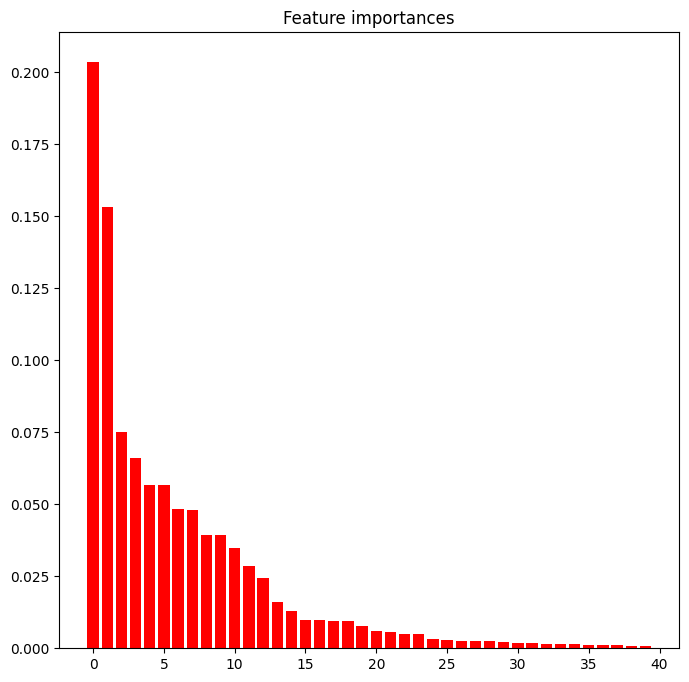

In [65]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8,8))
plt.title("Feature importances")
plt.bar(np.arange(len(importances)), importances[indices], color="red")
plt.show()